# Design and Implementation of an Information Retrieval System 

## By: Khizer Ahmed Biyabani 
#### School of Computing, Dublin City University

### Assignemnt 1 Under the Module CA6005I - Mechanics of Search 

## 1. Importing the necessary Libraries

In [ ]:
# Text extraction or data collection libraries

from os import listdir, path 
import xml.etree.ElementTree as ET

#Librarries for text pre-processing

import re
import string
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')
from nltk.stem import PorterStemmer, SnowballStemmer
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')
#nltk.download()
from nltk.corpus import wordnet
from itertools import chain


import math
import numpy as np
#from tqdm import tqdm
import itertools
from contextlib import redirect_stdout



## 2. Loading our dataset

In [ ]:
#Loading the text files from the given collection
mypath = 'D:/Mechanics of Search/CA6005_2022Assignement/CA6005_2022/COLLECTION/'
files = [path.join(mypath, f) for f in listdir(mypath) if f.endswith('.xml')]

querry_path = 'D:/Mechanics of Search/CA6005_2022Assignement/CA6005_2022/topics'
querry_files = [path.join(querry_path, f) for f in listdir(querry_path) if f.endswith('.xml')]

## 3. Data Structure for our dataset

### Creating a dictionary to store the text of the doccuments

In [ ]:
#Creating E-tree for each of the text or collection xml files.

tree=[]
root=[]
for file in files:
    tree.append(ET.parse(file))

# root.append(tree.getroot())

for i in tree:
    root.append(i.getroot())



In [ ]:
#Creating E-tree for each of the topics or query xml files.
querry_tree=[]
querry_roots=[]

for file in querry_files:
    querry_tree.append(ET.parse(file))
    
for i in querry_tree:
    querry_roots.append(i.getroot())


In [ ]:
# Creating a dictionary for the data 
texts=[]
docids=[]
headlines=[]
for i in range(0, len(root)):
    for text in root[i].findall('TEXT'):
        texts.append(text.text) 
    for docid in root[i].findall('DOCID'):
        docids.append(docid.text)          
    for head in root[i].findall('HEADLINE'):
        headlines.append(head.text)
    i=i+1
    
print(len(texts),len(docids),len(headlines))

In [ ]:
# Creating a dictionary for the queries 

querry_id=[]
querry_title=[]
querry_desc=[]
querry_narr=[]

for i in range(0, len(querry_roots)):
    for qid in querry_roots[i].findall('QUERYID'):
        querry_id.append(qid.text) 
    for title in querry_roots[i].findall('TITLE'):
        querry_title.append(title.text)          
    for desc in querry_roots[i].findall('DESC'):
        querry_desc.append(desc.text)
    for narr in querry_roots[i].findall('NARR'):
        querry_narr.append(narr.text)
    i=i+1

In [ ]:
data2 = {'id':docids,'headline':headlines,'text':texts}

data2['id'][2]

In [ ]:
# Creating a backup dictionary 

data1={key: value for key, *value in zip(docids, headlines, texts)}
data1['LA010194-0009'][:5]

In [ ]:
# Creating a backup dictionary 

q_data = {'q_id':querry_id,'q_title':querry_title,'q_desc':querry_desc,'q_narr':querry_narr}
q_data['q_id'][1]

In [ ]:
q_data1={key: value for key, *value in zip(querry_id,querry_title,querry_desc,querry_narr)}
q_data1['10.2452/142-AH']

In [ ]:
# A glimpse of our 3rd Collection

data2['text'][2]

## 4. Text Preprocessing

### There are several steps involved in text pre-processing such as:

### (i) Cleaning None-Type

In [ ]:
#Function for None_type removal

def none_type_remove(stri):
    if stri == None:
        return ""
    else:
        return stri

for i in range(0,len(data2['text'])):
    data2['text'][i]= none_type_remove(data2['text'][i])
    data2['headline'][i]= none_type_remove(data2['headline'][i])

### (ii) Changing the case of the text to Lower.

In [ ]:
#Changing the case of the text to lower using string.lower()

for i in range(0,len(data2['text'])):
    data2['text'][i]= data2['text'][i].lower()
    data2['headline'][i]= data2['headline'][i].lower()

#print(data2['headline'][1])
data2['text'][:10]  #Lower case text

### (iii) Expanding the english contractions

In [ ]:
#Defining a dictionary for all the known english contractions

contraction_List = {
  "ain ' t": "are not"," ' s":" is","aren ' t": "are not","can ' t": "can not","can ' t ' ve": "cannot have",
" ' cause": "because","could ' ve": "could have","couldn ' t": "could not","couldn ' t ' ve": "could not have",
"didn ' t": "did not","doesn ' t": "does not","don ' t": "do not","hadn ' t": "had not","hadn ' t ' ve": "had not have",
"hasn ' t": "has not","haven ' t": "have not","he ' d": "he would","he ' d ' ve": "he would have","he ' ll": "he will",
"he ' ll ' ve": "he will have","how ' d": "how did","how ' d ' y": "how do you","how ' ll": "how will","i ' d": "i would",
"i ' d ' ve": "i would have","i ' ll": "i will","i ' ll ' ve": "i will have","i ' m": "i am","i ' ve": "i have",
"isn ' t": "is not","it ' d": "it would","it ' d ' ve": "it would have","it ' ll": "it will","it ' ll ' ve": "it will have",
"let ' s": "let us","ma ' am": "madam","mayn ' t": "may not","might ' ve": "might have","mightn ' t": "might not",
"mightn ' t ' ve": "might not have","must ' ve": "must have","mustn ' t": "must not","mustn ' t ' ve": "must not have",
"needn ' t": "need not","needn ' t ' ve": "need not have","o ' clock": "of the clock","oughtn ' t": "ought not",
"oughtn ' t ' ve": "ought not have","shan ' t": "shall not","sha ' n ' t": "shall not",
"shan ' t ' ve": "shall not have","she ' d": "she would","she ' d ' ve": "she would have","she ' ll": "she will",
"she ' ll ' ve": "she will have","should ' ve": "should have","shouldn ' t": "should not",
"shouldn ' t ' ve": "should not have","so ' ve": "so have","that ' d": "that would","that ' d ' ve": "that would have",
"there ' d": "there would","there ' d ' ve": "there would have",
"they ' d": "they would","they ' d ' ve": "they would have","they ' ll": "they will","they ' ll ' ve": "they will have",
"they ' re": "they are","they ' ve": "they have","to ' ve": "to have","wasn ' t": "was not","we ' d": "we would",
"we ' d ' ve": "we would have","we ' ll": "we will","we ' ll ' ve": "we will have","we ' re": "we are","we ' ve": "we have",
"weren ' t": "were not","what ' ll": "what will","what ' ll ' ve": "what will have","what ' re": "what are",
"what ' ve": "what have","when ' ve": "when have","where ' d": "where did",
"where ' ve": "where have","who ' ll": "who will","who ' ll ' ve": "who will have","who ' ve": "who have",
"why ' ve": "why have","will ' ve": "will have","won ' t": "will not","won ' t ' ve": "will not have",
"would ' ve": "would have","wouldn ' t": "would not","wouldn ' t ' ve": "would not have","y ' all": "you all",
"y ' all ' d": "you all would","y ' all ' d ' ve": "you all would have","y ' all ' re": "you all are","y ' all ' ve": "you all have",
"you ' d": "you would","you ' d ' ve": "you would have","you ' ll": "you will","you ' ll ' ve": "you will have",
"you ' re": "you are","you ' ve": "you have"
}

contraction_List_re = re.compile('(%s)' % '|'.join(contraction_List.keys()))

contraction_List_re

In [ ]:
def expandContractions(text, c_re=contraction_List_re):
    def replace(match):
        return contraction_List[match.group(0)]
    return c_re.sub(replace, text)

In [ ]:
#Tried to use different regular expressions to match the contractions in the  text.


# regex = r'\b[\':]\b'
# s = "you ' d"
# print(re.sub(regex, ' \g<0> ', s))

In [ ]:
# def getList(dict):
#     list = []
#     for key in dict.keys():
#         list.append(key)
          
#     return list

# contraction_List_keys=getList(contraction_List)

In [ ]:
# contraction_List_keys_withoutspace=[]
# def contractions_withoutspace(x):
#     regex = r'\b[\':]\b'
#     return re.sub(regex,' \g<0> ',x)

# for i in contraction_List_keys:
#     contraction_List_keys_withoutspace.append(contractions_withoutspace(i))
    

In [ ]:
#Expanding the english contractions of our given text corpus. 
for i in range(0,len(data2['text'])):
    data2['text'][i]=expandContractions(data2['text'][i])
    data2['headline'][i]=expandContractions(data2['headline'][i])

In [ ]:
#Checking for the third doccument. 
print(data2['headline'][0])
data2['text'][:10]

### (iv) Removing Punctuation 

In [ ]:
#The punctuations in English

string.punctuation

In [ ]:
def remove_punct(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

# data['text']= data['text'][x].apply(lambda x:remove_punct(x))

for i in range(0,len(data2['text'])):
    data2['text'][i]= remove_punct(data2['text'][i])
    data2['headline'][i]= remove_punct(data2['headline'][i])

print(data2['headline'][2])
data2['text'][0]

In [ ]:
data2['text'][:10]

In [ ]:
# porter_stemmer = PorterStemmer()
# snowball_stemmer = SnowballStemmer(language = 'english')

In [ ]:
# def stemming(text):
#     stem_text = [snowball_stemmer.stem(word) for word in text]
#     return stem_text

# for i in range(0, len(data2)):
#     data2['text'][i]= stemming(data2['text'][i])
#     data2['headline'][i]= stemming(data2['headline'][i])

# data2['text'][2]

### (v) Lemmatisation, Tokenisation of Text

In [ ]:
#Creating the object for the Lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [ ]:
#Defining a function for wordnet pos tagging and lemmatizing accordingly.

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [ ]:
#Lemmatizing the text. This would take about 3-4hrs to run.

def lemmatizer(text):
    return [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(text)]


In [ ]:
for i in range(0,len(data2['text'])):
    data2['text'][i]=lemmatizer(data2['text'][i])

In [ ]:
#Similarly Lemmatizing the headlines
for i in range(0,len(data2['headline'])):
    data2['headline'][i]=lemmatizer(data2['headline'][i])

### Note: to avoid long processing I stored the instance of this notebook using dill command.

In [ ]:
#To avoid long processing of the entire data again, I am storing it in another varriable.

# import csv
# a_file = open("data.csv", "w")
# # a_dict = {"a": 1, "b": 2}

# writer = csv.writer(a_file)
# for key, value in data2.items():
#     writer.writerow([key, value])

# a_file.close()

### (vi) Stop Words Removal

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')

# data_ws = [word for word in data2['text'][0] if not word in stopwords1]
# data_ws

for i in range(0,len(data['text'])):
    data['text'][i]=[word for word in data['text'][i] if not word in stopwords]
    data['headline'][i]=[word for word in data['headline'][i] if not word in stopwords]


data['text']

## 5. Creating an Inverted Index for our given doccuments

### Combining headline, DocID and Text in one dictionary

In [ ]:
#Creating a dictionary {'DoccumentID':['Headlines','Text']}

data3 ={key: value for key, *value in zip(data['id'], data['headline'], data['text'])}
data3

In [ ]:
data['headline'][0]

In [ ]:
for i in data3.keys():
    data3[i]=list(chain.from_iterable(data3[i]))

In [ ]:
data3

In [ ]:
#Creating a list of vocabulary or the total words in the given doccument data.

vocab = [item for item in data3.values()]
vocab = list(chain.from_iterable(vocab))

In [ ]:
len(vocab)

In [ ]:
#The total vocabulary is the set of unique words in the given doccuments. 

total_vocab = list(set(vocab))
len(total_vocab)

In [ ]:
inv_index = {} #dictionary: key =word/term, value: [docid, termfrequency]
for x in total_vocab:
    for y, z in data3.items():
        if x in z:
            wordfreq = z.count(x)
            inv_index.setdefault(x, []).append((y, wordfreq)) 

In [ ]:
len(inv_index)

In [ ]:
#An example of inverted index for the word regardless.

inv_index['regardless'][:10]

In [ ]:
inv_index

In [ ]:
#To avoid long processing of the entire inverted index  again, I am storing it in another varriable.

import csv
a_file = open("inverted_index.csv", "w")
# a_dict = {"a": 1, "b": 2}

writer = csv.writer(a_file)
for key, value in inv_index.items():
    writer.writerow([key, value])

a_file.close()

In [ ]:
''' To avoid the loss of each of these varriables I am storing them with the help of %Store method 
so that I can access them again.'''

# %store inv_index 
# %store vocab
# %store total_vocab
# %store data3

#%store -r inv_index 
#%store -r vocab
#%store -r total_vocab
#%store -r data3

## 6. Querry Preprocessing

All the previous methods used in pre-processing of the documents have been used the same for each of the queries.

In [ ]:
def querry_processing(querry_text):
    
    #Removing None_types from the querries.
    querry_text=none_type_remove(querry_text)
    
    #Changing the case of the querry_text
    querry_text=querry_text.lower()
    
    #Expanding english contractions
    querry_text = expandContractions(querry_text)
    
    #Removing Punctuations
    querry_text = remove_punct(querry_text)
    
    #Lemmatisation, pos-tagging and tokenisation
    querry_text = lemmatizer(querry_text)
    
    #Stop_words removal
    #querry_text = [word for word in querry_text if not word in stopwords]

    return querry_text



for i in range(0,len(q_data['q_title'])):
    q_data['q_title'][i]=querry_processing(q_data['q_title'][i])
    q_data['q_desc'][i]=querry_processing(q_data['q_desc'][i])
    q_data['q_narr'][i]=querry_processing(q_data['q_narr'][i])    
  

In [ ]:
#Stop words removal from querry

stopwords = nltk.corpus.stopwords.words('english')

for i in range(0,len(q_data['q_title'])):
    q_data['q_title'][i]=[word for word in q_data['q_title'][i] if not word in stopwords]
    q_data['q_desc'][i]=[word for word in q_data['q_desc'][i] if not word in stopwords]
    q_data['q_narr'][i]=[word for word in q_data['q_narr'][i] if not word in stopwords]


In [ ]:
len(q_data['q_narr'])

In [ ]:
q_data['q_title']

In [ ]:
#Creating a querry dictionary {key=q_id: value=[q_title,q_desc,q_narr]}

q_data1 ={key: value for key, *value in zip(q_data['q_id'], q_data['q_title'])}
for i in q_data1.keys():
    q_data1[i]=list(chain.from_iterable(q_data1[i]))

In [ ]:
q_data['q_title'][0]

In [ ]:
# %store q_data

In [ ]:
#Storing our varriable so that we can use them again.

# %store -r inv_index 
#%store -r vocab
# %store -r total_vocab
# %store -r data3

In [ ]:
#store -r q_data

In [ ]:
q_data['q_title'][0][0]

In [ ]:
total_freq={}
for i in vocab:
    sum1=0
    for j in range(0,len(inv_index[i])):
        sum1= sum1 + inv_index[i][j][1]
    total_freq.setdefault(i,sum1)
total_freq

In [ ]:
#%store -r total_freq

In [ ]:
total_freq['croon']

## Ranking and Evaluation

## 1. VSM

## Traditional Method

We can use the following formulae to find the cosine similarity, lets imagine document and query being the vectors of the terms of the voncabulary of the corpus. Hence, the cosine similarity can be detrmined by:

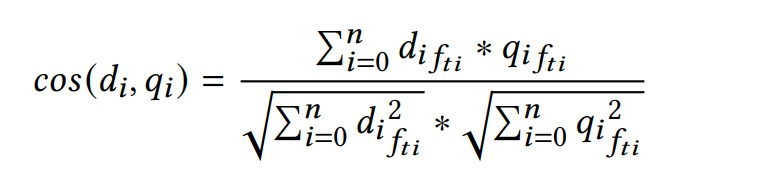

The further steps explain how the above formulae is computed using the  inverse index dictionary named  "inv_index" created. We break the formulae into two parts the numerator and denominator. The denominator further can be broken down into two parts the document normalisation factor the firts square root term and the query normalisation factor the second term.

In [ ]:
# Function to extract unique terms from a document

def unique(list1): 
    # initialize a null list
    unique_list = []     
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    return unique_list

In [ ]:
#Finding the magnitude of document or document normalisation factor

denom = {}
t_d = []
for did in data3:
    denom[did] = 0
    for term in unique(data3[did]):
        if term not in t_d:
            t_d.append(term)
            denom[did] += (data3[did].count(term))**2
        t_d = []
        
denom1 = {}
for i in denom.keys():
    denom1[i]=math.sqrt(denom[i])

In [ ]:
denom1

In [ ]:
#Finding the magnitude of query or query normalisation factor


denom2 = {}
t_d = []
for qid in q_data1:
    denom2[qid] = 0
    for term in q_data1[qid]:
        if term not in t_d:
            t_d.append(term)
            denom2[qid] += (q_data1[qid].count(term))**2
        t_d = []
        
denom2_q = {}
for i in denom2:
    denom2_q[i]=math.sqrt(denom2[i])

In [ ]:
denom2_q

In [ ]:
def denominator(qid):
    denomina = {}
    for did in denom1:
        denomina[did]= denom1[did]*denom2_q[qid]
    return denomina

denomina_final = {} 
for qid in q_data1:
    denomina_final[qid] = denominator(qid)

In [ ]:
denomina_final

In [ ]:
#Storing the denominator dictionaries to avoid extra computation.

# %store q_data1
# %store denom2_q
# %store denom1

# %store -r q_data1
# %store -r denom2_q
# %store -r denom1

In [ ]:
#Finding the numerator term

def vec_num (query):
    vecn = {}
    for term in query:
        if term not in inv_index:
            continue
        for i in range (0, len(inv_index[term])):
            if inv_index[term][i][0] not in vecn:
                vecn[inv_index[term][i][0]] = 0
            vecn[inv_index[term][i][0]] += inv_index[term][i][1] * query.count(term)
    #print(bm)
    return vecn

vecnu = {}
for q_id in q_data1:
    vecnu[q_id] = vec_num(q_data1[q_id])

In [ ]:
#Checking the numerator so created.

vecnu

In [ ]:
# Cosine Similarity calculation combining the above found numerator and denominator.

for qid in vecnu:
    for did in vecnu[qid]:
        vecnu[qid][did] = vecnu[qid][did] / denomina_final[qid][did]

In [ ]:
#Storing the final scores in a separate dictionary named as cosine_simi.

cosine_simi = vecnu
cosine_simi

In [ ]:
#Sorting the values of cosine similarity score in descending order.


sim_sort = {}
for i in cosine_simi.keys():
    sim_sort[i]=(sorted(cosine_simi[i].items(), key=lambda x: x[1], reverse = True))

sim_sort

In [ ]:
#Redirecting the top 10 or 100 relevant documents in a text file for the TREC_eval script.


with open('output1VSM_TOP10.txt', 'w') as f:
        with redirect_stdout(f): 
            for i in sim_sort:
                count =0
                for j in range(0,len(sim_sort[i])):
                    if(count>=10):
                        break
                    print(i,'1',sim_sort[i][j][0],count,sim_sort[i][j][1],'run1')
                    count+=1
#                 ans = max(similarity, key=lambda x: similarity[x])
#                 print(ans, "rank is", i+1)

##  TF-IDF 
We can use the following formulae to find the cosine similarity, lets imagine document as a vector of the inverse index each term in the voncabulary of the corpus and query as a vector representaion of the frequency of its term. Hence, the cosine similarity can be detrmined by:

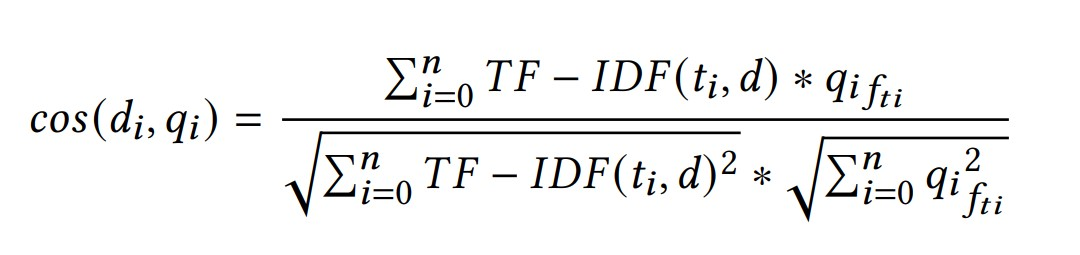


The further steps explain how the above formulae is computed using the tf_idf dictionary named "tf_idf" created. We break the formulae into two parts the numerator and denominator. The denominator further can be broken down into two parts the document normalisation factor the firts square root term and the query normalisation factor the second term.

In [ ]:
#Inverse Document frequency of each term in a document.

idf = {}
length=len(data3)
for word in inv_index.keys():
    idf[word]=np.log2(length/len(inv_index[word]))



In [ ]:
idf

In [ ]:
idf['regardless']

In [ ]:
#Creating the tf_idf matrix for each of the term. 

tf_idf = {}
for word in inv_index.keys():
    for i in range (0, len(inv_index[word])):
        #tf_idf[word] = idf[word] * inv_index[word][i][1]
        tf_idf.setdefault(word,[]).append((inv_index[word][i][0],idf[word] * inv_index[word][i][1]))

In [ ]:
tf_idf

In [ ]:
# %store tf_idf
# %store idf

# %store -r  tf_idf
# %store -r idf

In [ ]:
#Getting the numerator of the cosine similarity

def simi_nu(query):
    num_s={}
    for term in query:
        if term not in tf_idf:
            continue
        for i in range(0,len(tf_idf[term])):
            if tf_idf[term][i][0] not in num_s:
                num_s[tf_idf[term][i][0]] = 0
            num_s[tf_idf[term][i][0]]+= tf_idf[term][i][1]*query.count(term)    
    return num_s           

In [ ]:
vecnu_s = {}
for q_id in q_data1:
    vecnu_s[q_id] = simi_nu(q_data1[q_id])

In [ ]:
#Document Normalisation Factor usinf TF-IDF approach

def d1(term):
    d1={}
    for term in tf_idf:
        for i in range(0,tf_idf[term]):
            d1[tf_idf[term][i][0]]=tf_idf[term][i][1]**2
    return d1


d1={}
for did in data3:
    for term in unique(data3[did]):
        #for i in range(0,len(unique(data3[did]))):
        if did not in d1:
            d1[did]=0
        d1[did]+=((data3[did].count(term))*np.log2(len(data3)/((data3[did].count(term)))))**2
        #for term in tf_idf:
        
for i in d1.keys():
    d1[i]=math.sqrt(d1[i])

In [ ]:
d1

In [ ]:
# Combining both the document normalisation factor and the earlier found query normalisation factor.

def denominator1(qid):
    denomina = {}
    for did in d1:
        denomina[did]= d1[did]*denom2_q[qid]
    return denomina

In [ ]:
denomina_final1 = {} 
for qid in q_data1:
    denomina_final1[qid] = denominator1(qid)

In [ ]:
# Cosine Similarity calculation 


for qid in vecnu_s:
    for did in vecnu_s[qid]:
        vecnu_s[qid][did] = vecnu_s[qid][did] / denomina_final1[qid][did]

In [ ]:
#Storing the cosine similarity in separate dictionary cos1 - for the tfidf approach

cos1 = vecnu_s

In [ ]:
#Sorting each the smilarity scores

sim_sort1 = {}
for i in cos1.keys():
    sim_sort1[i]=(sorted(cos1[i].items(), key=lambda x: x[1], reverse = True))

In [ ]:
sim_sort1

In [ ]:
#Redirecting the top 10 or 100 relevant documents in a text file for the TREC_eval script.


with open('output_VSM_top10_tfidf.txt', 'w') as f:
        with redirect_stdout(f): 
            for i in sim_sort1:
                count =0
                for j in range(0,len(sim_sort1[i])):
                    if(count>=10):
                        break
                    print(i,'1',sim_sort1[i][j][0],count,sim_sort1[i][j][1],'run1')
                    count+=1
#                 ans = max(similarity, key=lambda x: similarity[x])
#                 print(ans, "rank is", i+1)

## 2. BM25 Model  Implementation

The BM25 score can be detrmined by:

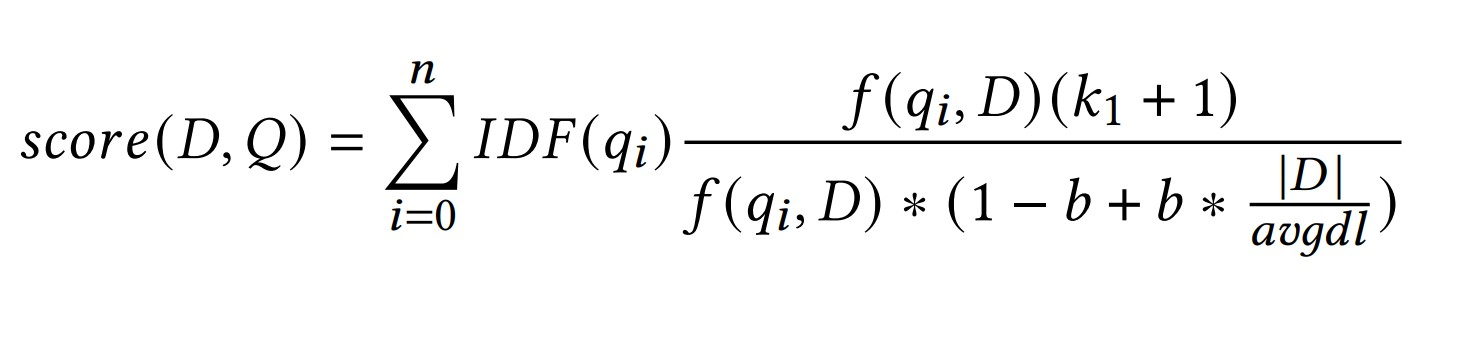

In [ ]:
#A separate formulae of idf. It gives us same results hence this can be avoided

idf_bm25 = {}
length=len(data3)
for word in inv_index.keys():
    idf_bm25[word]=np.log2(1+((length-len(inv_index[word])+0.5)/len(inv_index[word])+0.5))

In [ ]:
idf_bm25

In [ ]:
#Finding the average doccument length (avgdl)

sum1=0
for doc in data3:
    #for i in range(0,len(data3)):
        sum1 += len(data3[doc])

avgdl = sum1 / len(data3)

In [ ]:
avgdl

In [ ]:
def bm25score(query):
    mul =0 
    bm25_score ={}

    k1=1.5 
    b=0.75
    #for index,did in enumerate()
    for term in query:
        if term not in inv_index:
            continue
        for i in range(0,len(inv_index[term])):
            if inv_index[term][i][0] not in bm25_score:
                bm25_score[inv_index[term][i][0]]=0
#             upper = (inv_index[term][i][1])*(k1+1)*(idf[term])
#             lower = (inv_index[term][i][1])*(k1+1)*(idf[term])/(inv_index[term][i][1]) + (k1 *((1- b) + (b*((len(data3[inv_index[term][i][0]]))/avgdl))))
            bm25_score[inv_index[term][i][0]] += (inv_index[term][i][1])*(k1+1)*(idf_bm25[term])/((inv_index[term][i][1]) + (k1 *((1- b) + (b*(len(data3[inv_index[term][i][0]])/avgdl)))))
#             bm25_score.setdefault(inv_index[term][i][0],mul)
            
            
    return bm25_score

In [ ]:
bm25 = {}
for q_id in q_data1:
    bm25[q_id] = bm25score(q_data1[q_id])

In [ ]:
bm25['10.2452/141-AH']

In [ ]:
#Sorting the values of bm25 score in descending order.

bm25_sort = {}
for i in bm25.keys():
    bm25_sort[i]=(sorted(bm25[i].items(), key=lambda x: x[1], reverse = True))

In [ ]:
bm25_sort

In [ ]:
#Creating an output file for TREC_EVAL.


with open('output_bm25_TOP100.txt', 'w') as f:
        with redirect_stdout(f): 
            for i in bm25_sort:
                count =0
                for j in range(0,len(bm25_sort[i])):
                    if(count>=100):
                        break
                    print(i,'1',bm25_sort[i][j][0],count,bm25_sort[i][j][1],'run1')
                    count+=1
#                 ans = max(similarity, key=lambda x: similarity[x])
#                 print(ans, "rank is", i+1)

In [ ]:
# %store bm25
# %store bm25_sort

# %store -r bm25
# %store -r bm25_sort

## 3. Language Model (Multinomial Probabilistic Model)

In [ ]:
#Finding the probability of each query term in each doccument.

def prob(querry):
    lambda1 = 0.5
    prob_term = {}
    for term in querry:
        if term not in inv_index.keys():
            continue
        for i in range(0,len(inv_index[term])):
            if inv_index[term][i][0] not in prob_term:
                prob_term[inv_index[term][i][0]]= 1 
            if term not in data3[inv_index[term][i][0]]:
                prob_term[inv_index[term][i][0]] *= total_freq[term]/len(vocab)
            prob_term[inv_index[term][i][0]] *= (inv_index[term][i][1]/len(data3[inv_index[term][i][0]])) 
        
    return prob_term
            
            
            

In [ ]:
prob_term={}
for qid in q_data1.keys():
    prob_term.setdefault(qid, prob(q_data1[qid])) 

In [ ]:
len(prob_term)

In [ ]:
#Sorting the values of probablistic model score in descending order.


prob_sort={}
for i in prob_term.keys():
    prob_sort[i]=(sorted(prob_term[i].items(), key=lambda x: x[1], reverse = True))

In [ ]:
prob_sort

In [ ]:
#Creating an output file for TREC_EVAL, top 10 or 100 documents.


with open('output_lm_top10.txt', 'w') as f:
        with redirect_stdout(f): 
            for i in prob_sort:
                count =0
                for j in range(0,len(prob_sort[i])):
                    if(count>=10):
                        break
                    print(i,'1',prob_sort[i][j][0],count,prob_sort[i][j][1],'run1')
                    count+=1
#                 ans = max(similarity, key=lambda x: similarity[x])
#                 print(ans, "rank is", i+1)

The evaluation of each of the models is done using the TREC_EVAL.